### Import Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

### Explore Data

In [2]:
BASE_DIR = "Dataset"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "valid")

print(f"Base Directory: {BASE_DIR}")
print(f"List Directory in Base Directory: {os.listdir(BASE_DIR)}\n")
print(f"Train Directory: {TRAIN_DIR}")
print(f"List Directory in Train Directory: {os.listdir(TRAIN_DIR)}\n")
print(f"Validation Directory: {VAL_DIR}")
print(f"List Directory in Validation Directory: {os.listdir(VAL_DIR)}")

Base Directory: Dataset
List Directory in Base Directory: ['train', 'valid']

Train Directory: Dataset\train
List Directory in Train Directory: ['Belimbing Sayur', 'Bunga Lawang', 'Jahe', 'Jeruk Nipis', 'Kunyit', 'Lengkuas', 'Mengkudu']

Validation Directory: Dataset\valid
List Directory in Validation Directory: ['Belimbing Sayur', 'Bunga Lawang', 'Jahe', 'Jeruk Nipis', 'Kunyit', 'Lengkuas', 'Mengkudu']


In [3]:
# Mengambil 4 gambar untuk tiap label
def get_images(directory):
    images = []
    label_dirs = os.listdir(directory)

    for label_dir in label_dirs:
        label_path = os.path.join(directory, label_dir)
        image_filenames = os.listdir(label_path)
    
        for filename in image_filenames[:4]:
            images.append(os.path.join(label_path, filename))

    return images


In [4]:
data_sample = get_images(TRAIN_DIR)
print(f"number of image sample: {len(data_sample)}")

number of image sample: 28


In [5]:
# plotting data
def plot_image_sample(images):
    fig, ax = plt.subplots(7, 4, figsize=(10, 14))
    plt.suptitle("Train Dataset Examples", fontsize=16)
    plt.subplots_adjust(hspace=0.5)
    
    for i, image in enumerate(images):
        row, col = divmod(i, 4)
        img = tf.keras.utils.load_img(image)
        ax[row, col].imshow(img)
        ax[row, col].set_title(f"{os.listdir(TRAIN_DIR)[row]} {col+1}")
        ax[row, col].axis('off') 

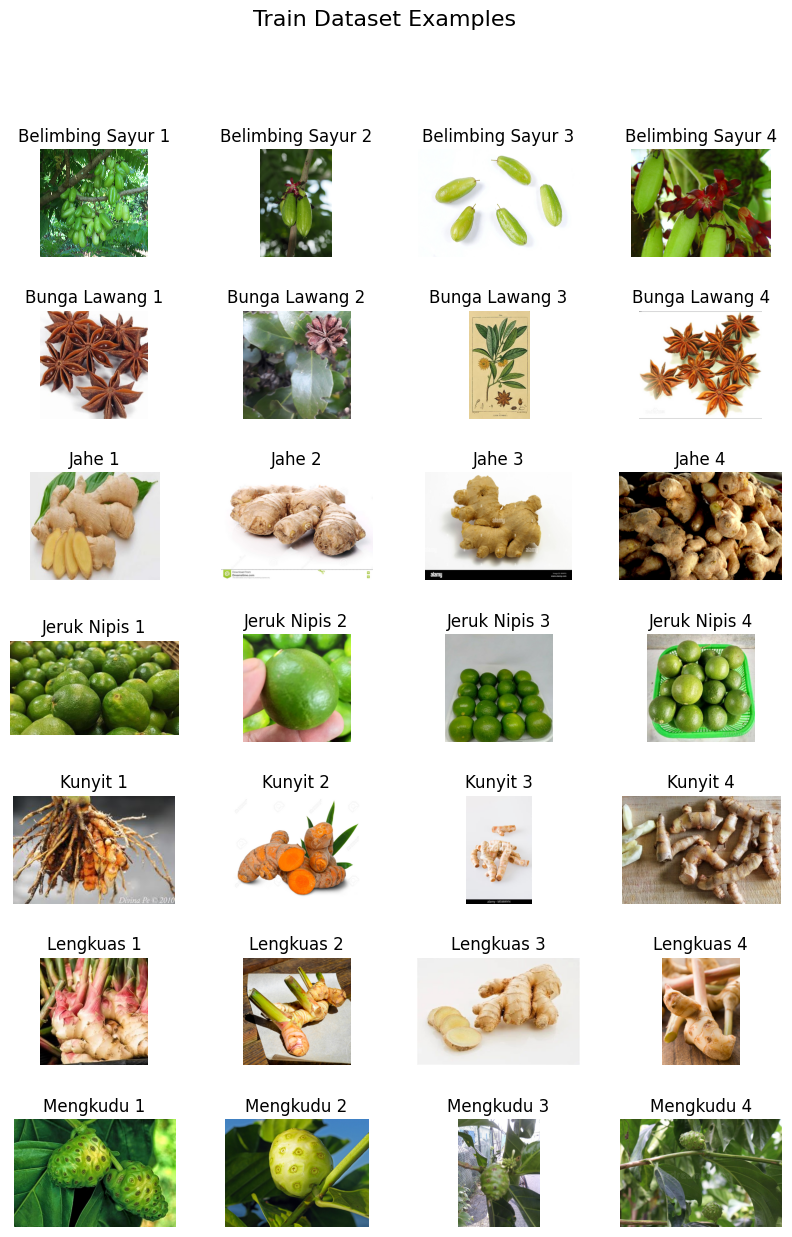

In [6]:
plot_image_sample(data_sample)

### Load Dataset

In [7]:
BATCH_SIZE = 16
IMAGE_SHAPE = (300, 300)

In [8]:
def load_dataset(train_dir, val_dir):
    train_datagen = ImageDataGenerator(rescale = 1/255.)
    val_datagen = ImageDataGenerator(rescale = 1/255.)

    train_dataset = train_datagen.flow_from_directory(directory = train_dir,
                                                  target_size = IMAGE_SHAPE,
                                                  batch_size = BATCH_SIZE,
                                                  class_mode = "categorical",
                                                  shuffle = True)

    val_dataset = val_datagen.flow_from_directory(directory = val_dir,
                                              target_size = IMAGE_SHAPE,
                                              batch_size = BATCH_SIZE,
                                              class_mode = "categorical")
    
    return train_dataset, val_dataset


In [9]:
train_dataset, val_dataset = load_dataset(TRAIN_DIR, VAL_DIR)

Found 2055 images belonging to 7 classes.
Found 487 images belonging to 7 classes.


### Build CNN Model

In [10]:
NUM_CLASSES = train_dataset.num_classes
LEARNING_RATE = 0.001
EPOCHS = 20

In [11]:
# buat dan compile model
def build_model(num_classes, lr):
    model = Sequential(
        [
            Input(shape = (300, 300, 3)),
            Conv2D(32, (3, 3), activation = "relu"),
            MaxPooling2D(2, 2),
            Conv2D(32, (3, 3), activation = "relu"),
            MaxPooling2D(2, 2),
            Conv2D(64, (3, 3), activation = "relu"),
            MaxPooling2D(2, 2),
            Conv2D(64, (3, 3), activation = "relu"),
            MaxPooling2D(2, 2),
            Conv2D(64, (3, 3), activation = "relu"),
            MaxPooling2D(2, 2),
            Flatten(),
            Dense(256, activation = "relu"),
            Dropout(0.5),
            Dense(num_classes, activation = "softmax")
        ]
    )

    model.compile(loss = CategoricalCrossentropy,
                  optimizer = Adam(learning_rate = lr),
                  metrics = ["accuracy"])

    return model

In [12]:
model = build_model(NUM_CLASSES, LEARNING_RATE)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 907,367 (3.46 MB)

 Trainable params: 907,367 (3.46 MB)

 Non-trainable params: 0 (0.00 B)

### Train Model

In [13]:
history = model.fit(train_dataset,
                    epochs = EPOCHS,
                    validation_data = val_dataset)

c:\Users\ALFIAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 33/129 ━━━━━━━━━━━━━━━━━━━━ 54s 566ms/step - accuracy: 0.1956 - loss: 1.9553

c:\Users\ALFIAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 84s 627ms/step - accuracy: 0.2370 - loss: 1.8027 - val_accuracy: 0.4394 - val_loss: 1.2491
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 75s 578ms/step - accuracy: 0.3891 - loss: 1.3411 - val_accuracy: 0.5257 - val_loss: 1.0779
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 74s 571ms/step - accuracy: 0.4838 - loss: 1.2098 - val_accuracy: 0.5339 - val_loss: 1.0024
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 74s 577ms/step - accuracy: 0.5176 - loss: 1.0760 - val_accuracy: 0.5544 - val_loss: 1.0127
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 74s 574ms/step - accuracy: 0.5702 - loss: 1.0151 - val_accuracy: 0.5626 - val_loss: 0.9949
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 73s 566ms/step - accuracy: 0.5598 - loss: 0.9708 - val_accuracy: 0.6242 - val_loss: 0.8828
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 72s 555ms/step - accuracy: 0.6095 - loss: 0.9024 - val_accuracy: 0.6653 - val_loss: 0.8259
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 73s 564ms/step - accuracy: 0.6183 - loss: 0.9141 - val

In [14]:
# plotting accuracy dan loss
def plot_metrics(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(acc))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].plot(epochs, acc, "r", label="Training Accuracy")
    ax[0].plot(epochs, val_acc, "b", label="Validation Accuracy")
    ax[0].legend()
    ax[0].set_title("Accuracy")
    ax[0].set_ylabel("accuracy")
    ax[0].set_xlabel("epoch")

    ax[1].plot(epochs, loss, "r", label="Training Loss")
    ax[1].plot(epochs, val_loss, "b", label="Validation Loss")
    ax[1].legend()
    ax[1].set_title("Loss")
    ax[1].set_ylabel("loss")
    ax[1].set_xlabel("epoch")

    plt.show()

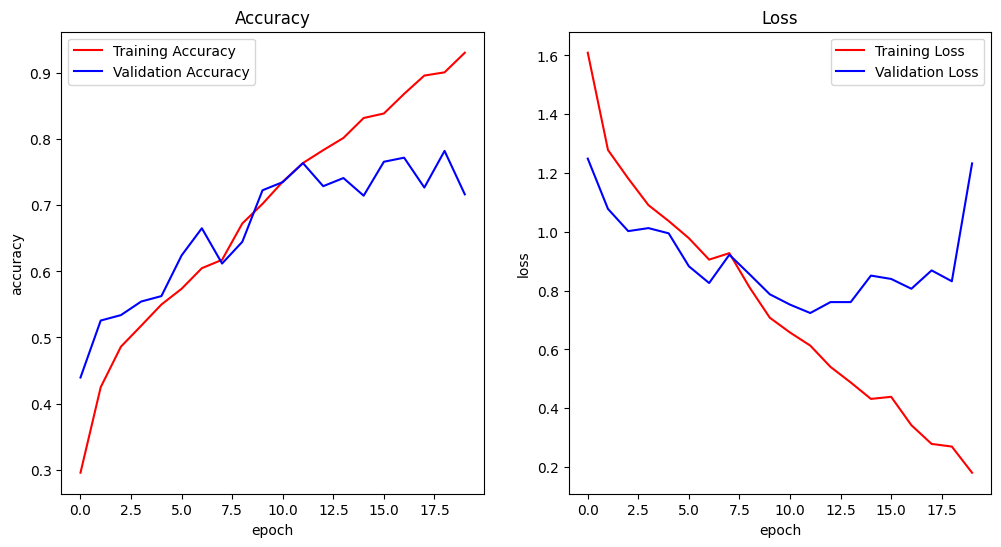

In [15]:
plot_metrics(history)